<a href="https://colab.research.google.com/github/huricane85/FPL-API-Fixture-modeler/blob/main/FPL_Model_v1_1_04_04_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!git clone https://github.com/doughagey/UnderstatScraper

fatal: destination path 'UnderstatScraper' already exists and is not an empty directory.


In [66]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1 17:50:36 2020
@author: doug hagey
"""

import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is 
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '310',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    #player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    if weeks != '28wks':
        player_df.drop(['position','team_title'], axis=1, inplace=True)
    return(player_df)

#Creprint('Getting data for last 8 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2022', 'n_last_matches': '28'})
twentyeight_game_table = pd.DataFrame(json_player_data)
twentyeight_game_df = clean_df(twentyeight_game_table,'28wks')


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2022'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2022', 'n_last_matches': '28'})
twentyeight_game_table = pd.DataFrame(json_player_data)
twentyeight_game_df = clean_df(twentyeight_game_table, '28wks')

print('Merging Tables')
EPL_player_df = pd.merge(twentyeight_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, twentyeight_game_df, on=['id','player_name'])


print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined 2021.csv', encoding='utf-8', index=False)


Getting data for the whole season
Getting data for last 5 matches
Merging Tables
Writing CSV File


In [67]:
EPL_player_df

,id,player_name,games_x,time_x,goals_28wks_x,xG_28wks_x,assists_28wks_x,xA_28wks_x,shots_28wks_x,key_passes_28wks_x,...,shots_28wks_y,key_passes_28wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_28wks_y,npxG_28wks_y,xGChain,xGBuildup
0,8260,Erling Haaland,26,2140,28,23.960190907120705,5,4.408665340393782,90,19,...,90,19,4,0,F S,Manchester City,23,20.15434619784355,23.321432292461395,2.191996343433857
1,647,Harry Kane,28,2514,22,18.67817907780409,2,4.82374859880656,104,41,...,104,41,5,0,F,Tottenham,18,14.872338406741619,17.036890506744385,3.063931160606444
2,998,Ivan Toney,26,2336,17,18.485520754009485,4,3.881621390581131,75,20,...,75,20,9,0,F,Brentford,12,14.679681720212102,15.411244990304112,3.8031660076230764
3,556,Marcus Rashford,27,2236,14,12.471867196261883,3,2.4917316902428865,69,18,...,69,18,2,0,F M S,Manchester United,14,12.471867196261883,19.61304687615484,5.588982158340514
4,1250,Mohamed Salah,27,2397,12,13.968640696257353,7,6.2629787735641,82,48,...,82,48,2,0,F M,Liverpool,12,13.207471828907728,21.80546774715185,4.8836626168340445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,11362,Facundo Buonanotte,4,42,0,0.15204254537820816,1,0.10160453617572784,2,3,...,2,3,0,0,S,Brighton,0,0.15204254537820816,0.3552328273653984,0.22122468054294586
531,11363,Antoine Semenyo,7,228,0,0.27413253858685493,0,0.04051905870437622,2,1,...,2,1,0,0,F M S,Bournemouth,0,0.27413253858685493,1.0346557050943375,0.720004104077816
532,11366,Jhon Durán,6,53,0,0.7512963395565748,0,0,7,0,...,7,0,0,0,S,Aston Villa,0,0.7512963395565748,0.24072658689692616,0.08821941539645195
533,11367,Victor Kristiansen,5,416,0,0.08544669300317764,0,0.26779788732528687,1,4,...,1,4,1,0,D,Leicester,0,0.08544669300317764,1.5921539589762688,1.3503931686282158


In [68]:
twentyeight_game_df.to_csv('twentyeight_game_df.csv', encoding='utf-8', index=False)
twentyeight_game_df['time'] = twentyeight_game_df['time'].astype(int)
twentyeight_game_df = twentyeight_game_df[twentyeight_game_df['time'] > 40]
twentyeight_game_df['goals_28wks'] = twentyeight_game_df['goals_28wks'].astype(int)
twentyeight_game_df['xG_28wks'] = twentyeight_game_df['xG_28wks'].astype(float)
twentyeight_game_df['xgdifference'] = twentyeight_game_df.goals_28wks - twentyeight_game_df.xG_28wks
twentyeight_game_df['assists_28wks'] = twentyeight_game_df['assists_28wks'].astype(int)
twentyeight_game_df['xA_28wks'] = twentyeight_game_df['xA_28wks'].astype(float)
twentyeight_game_df['xAdifference'] = twentyeight_game_df.assists_28wks - twentyeight_game_df.xA_28wks
seasonedit = twentyeight_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])
sortXgDifference = seasonedit.sort_values('xgdifference')
sortXgDifference.head(10)

,id,player_name,games,goals_28wks,xG_28wks,assists_28wks,xA_28wks,shots_28wks,key_passes_28wks,position,team_title,npg_28wks,npxG_28wks,xGChain,xGBuildup,xgdifference,xAdifference
23,5543,Gabriel Jesus,17,7,11.725365,5,3.200542,56,23,F S,Arsenal,6,10.964196033775806,15.617703303694725,4.886702410876751,-4.725365,1.799458
20,10720,Darwin Núñez,21,8,12.527524,3,4.877843,76,23,F S,Liverpool,8,12.5275241099298,17.58024261146784,2.8826267579570413,-4.527524,-1.877843
56,6482,Eddie Nketiah,23,4,8.477807,1,1.361031,40,7,F S,Arsenal,4,8.47780709899962,9.311959840357304,1.759698249399662,-4.477807,-0.361031
51,1776,Jarrod Bowen,27,4,8.345030,2,4.264911,60,38,F M,West Ham,3,6.822691051289439,10.603500926867127,2.165683025494218,-4.345030,-2.264911
66,501,Danny Welbeck,20,3,6.984137,2,3.214506,39,17,F S,Brighton,3,6.98413741402328,11.277768220752478,3.747243480756879,-3.984137,-1.214506
103,822,Patrick Bamford,20,2,5.738181,2,0.969048,31,10,F S,Leeds,2,4.977007703855634,6.221748441457748,0.9235295094549656,-3.738181,1.030952
177,3621,Neal Maupay,20,1,4.330048,0,0.334446,27,6,F S,Everton,1,4.330047946423292,3.9664980359375477,1.1138306502252817,-3.330048,-0.334446
22,5220,Kai Havertz,27,7,10.091669,1,3.086476,57,32,F M S,Chelsea,6,9.330500397831202,12.830920368432999,3.038993990048766,-3.091669,-2.086476
196,7078,Sean Longstaff,27,1,3.941852,3,2.827718,25,19,M S,Newcastle United,1,3.941852178424597,9.073607079684734,4.0772268902510405,-2.941852,0.172282
496,10804,Deniz Undav,12,0,2.816797,0,0.893030,14,5,F M S,Brighton,0,2.8167970776557922,4.180749019607902,1.0131827890872955,-2.816797,-0.893030


In [69]:
sortXgDifference.tail(10)

,id,player_name,games,goals_28wks,xG_28wks,assists_28wks,xA_28wks,shots_28wks,key_passes_28wks,position,team_title,npg_28wks,npxG_28wks,xGChain,xGBuildup,xgdifference,xAdifference
62,10716,Manor Solomon,10,4,0.889147,0,0.248795,7,5,M S,Fulham,4,0.889147212728858,1.0584117341786623,0.48659031838178635,3.110853,-0.248795
43,7166,Mathias Jensen,28,5,1.791851,5,2.258105,18,33,M,Brentford,5,1.7918507438153028,6.853222046047449,4.712294660508633,3.208149,2.741895
1,647,Harry Kane,28,22,18.678179,2,4.823749,104,41,F,Tottenham,18,14.872338406741619,17.036890506744385,3.063931160606444,3.321821,-2.823749
5,7322,Bukayo Saka,28,12,8.589807,10,5.556230,66,61,F M S,Arsenal,10,7.067467965185642,18.258643992245197,9.001119613647461,3.410193,4.443770
8,2381,Rodrigo,21,11,7.380343,1,1.932208,54,13,F M S,Leeds,10,6.619173593819141,8.823007866740227,2.3534745248034596,3.619657,-0.932208
6,7752,Gabriel Martinelli,28,12,8.297306,3,6.814451,69,44,F M S,Arsenal,12,8.297306101769209,20.868492770940065,8.972832642495632,3.702694,-3.814451
9,7420,Miguel Almirón,25,11,7.006077,1,1.937542,50,18,F S,Newcastle United,11,7.006077282130718,11.025347724556923,4.3116087801754475,3.993923,-0.937542
0,8260,Erling Haaland,26,28,23.960191,5,4.408665,90,19,F S,Manchester City,23,20.15434619784355,23.321432292461395,2.191996343433857,4.039809,0.591335
12,6055,Phil Foden,24,9,4.764219,5,4.076641,35,34,F M S,Manchester City,9,4.764218535274267,12.989914059638977,6.023532822728157,4.235781,0.923359
14,6818,James Maddison,21,9,3.982002,6,4.816452,59,48,F M S,Leicester,9,3.9820023281499743,8.989696528762579,4.098894331604242,5.017998,1.183548


In [70]:
twentyeight_game_df

,id,player_name,games,time,goals_28wks,xG_28wks,assists_28wks,xA_28wks,shots_28wks,key_passes_28wks,yellow_cards,red_cards,position,team_title,npg_28wks,npxG_28wks,xGChain,xGBuildup,xgdifference,xAdifference
0,8260,Erling Haaland,26,2140,28,23.960191,5,4.408665,90,19,4,0,F S,Manchester City,23,20.15434619784355,23.321432292461395,2.191996343433857,4.039809,0.591335
1,647,Harry Kane,28,2514,22,18.678179,2,4.823749,104,41,5,0,F,Tottenham,18,14.872338406741619,17.036890506744385,3.063931160606444,3.321821,-2.823749
2,998,Ivan Toney,26,2336,17,18.485521,4,3.881621,75,20,9,0,F,Brentford,12,14.679681720212102,15.411244990304112,3.8031660076230764,-1.485521,0.118379
3,556,Marcus Rashford,27,2236,14,12.471867,3,2.491732,69,18,2,0,F M S,Manchester United,14,12.471867196261883,19.61304687615484,5.588982158340514,1.528133,0.508268
4,1250,Mohamed Salah,27,2397,12,13.968641,7,6.262979,82,48,2,0,F M,Liverpool,12,13.207471828907728,21.80546774715185,4.8836626168340445,-1.968641,0.737021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,11360,Paul Onuachu,7,283,0,0.261346,0,0.320011,6,4,0,0,F S,Southampton,0,0.2613460347056389,0.6741489097476006,0.10098401457071304,-0.261346,-0.320011
530,11362,Facundo Buonanotte,4,42,0,0.152043,1,0.101605,2,3,0,0,S,Brighton,0,0.15204254537820816,0.3552328273653984,0.22122468054294586,-0.152043,0.898395
531,11363,Antoine Semenyo,7,228,0,0.274133,0,0.040519,2,1,0,0,F M S,Bournemouth,0,0.27413253858685493,1.0346557050943375,0.720004104077816,-0.274133,-0.040519
532,11366,Jhon Durán,6,53,0,0.751296,0,0.000000,7,0,0,0,S,Aston Villa,0,0.7512963395565748,0.24072658689692616,0.08821941539645195,-0.751296,0.000000


In [71]:
twentyeightgamedftidy = twentyeight_game_df.drop(columns=[
 'time',
 'goals_28wks',
 'assists_28wks',
 'shots_28wks',
 'key_passes_28wks',
 'yellow_cards',
 'red_cards',
 'npg_28wks',
 'npxG_28wks',
 'xGChain',
 'xGBuildup',
 'xgdifference',
 'xAdifference'])
twentyeightgamedftidy

,id,player_name,games,xG_28wks,xA_28wks,position,team_title
0,8260,Erling Haaland,26,23.960191,4.408665,F S,Manchester City
1,647,Harry Kane,28,18.678179,4.823749,F,Tottenham
2,998,Ivan Toney,26,18.485521,3.881621,F,Brentford
3,556,Marcus Rashford,27,12.471867,2.491732,F M S,Manchester United
4,1250,Mohamed Salah,27,13.968641,6.262979,F M,Liverpool
...,...,...,...,...,...,...,...
529,11360,Paul Onuachu,7,0.261346,0.320011,F S,Southampton
530,11362,Facundo Buonanotte,4,0.152043,0.101605,S,Brighton
531,11363,Antoine Semenyo,7,0.274133,0.040519,F M S,Bournemouth
532,11366,Jhon Durán,6,0.751296,0.000000,S,Aston Villa


In [72]:
!git clone https://github.com/pratos/fpl-mappers
!git clone https://github.com/ChrisMusson/FPL-ID-Map


fatal: destination path 'fpl-mappers' already exists and is not an empty directory.
fatal: destination path 'FPL-ID-Map' already exists and is not an empty directory.


In [73]:
data1 = pd.read_csv('/content/FPL-ID-Map/Understat.csv', on_bad_lines='skip')
data2 = pd.read_csv('/content/FPL-ID-Map/FPL/22-23.csv', on_bad_lines='skip')
understatwithfplid1 = pd.merge(data2, 
                     data1, 
                     on ='code', 
                     how ='left')
understatid = understatwithfplid1.drop(columns=[ 
'code',
 'first_name_x',
 'second_name_x',
 'web_name_x',
 'first_name_y',
 'second_name_y',
 'web_name_y',])
twentyeight_game_df.rename(columns={'id': 'understat'}, inplace=True)
twentyeight_game_df

,understat,player_name,games,time,goals_28wks,xG_28wks,assists_28wks,xA_28wks,shots_28wks,key_passes_28wks,yellow_cards,red_cards,position,team_title,npg_28wks,npxG_28wks,xGChain,xGBuildup,xgdifference,xAdifference
0,8260,Erling Haaland,26,2140,28,23.960191,5,4.408665,90,19,4,0,F S,Manchester City,23,20.15434619784355,23.321432292461395,2.191996343433857,4.039809,0.591335
1,647,Harry Kane,28,2514,22,18.678179,2,4.823749,104,41,5,0,F,Tottenham,18,14.872338406741619,17.036890506744385,3.063931160606444,3.321821,-2.823749
2,998,Ivan Toney,26,2336,17,18.485521,4,3.881621,75,20,9,0,F,Brentford,12,14.679681720212102,15.411244990304112,3.8031660076230764,-1.485521,0.118379
3,556,Marcus Rashford,27,2236,14,12.471867,3,2.491732,69,18,2,0,F M S,Manchester United,14,12.471867196261883,19.61304687615484,5.588982158340514,1.528133,0.508268
4,1250,Mohamed Salah,27,2397,12,13.968641,7,6.262979,82,48,2,0,F M,Liverpool,12,13.207471828907728,21.80546774715185,4.8836626168340445,-1.968641,0.737021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,11360,Paul Onuachu,7,283,0,0.261346,0,0.320011,6,4,0,0,F S,Southampton,0,0.2613460347056389,0.6741489097476006,0.10098401457071304,-0.261346,-0.320011
530,11362,Facundo Buonanotte,4,42,0,0.152043,1,0.101605,2,3,0,0,S,Brighton,0,0.15204254537820816,0.3552328273653984,0.22122468054294586,-0.152043,0.898395
531,11363,Antoine Semenyo,7,228,0,0.274133,0,0.040519,2,1,0,0,F M S,Bournemouth,0,0.27413253858685493,1.0346557050943375,0.720004104077816,-0.274133,-0.040519
532,11366,Jhon Durán,6,53,0,0.751296,0,0.000000,7,0,0,0,S,Aston Villa,0,0.7512963395565748,0.24072658689692616,0.08821941539645195,-0.751296,0.000000


In [74]:
!git clone https://github.com/huricane85/FPL-API-Fixture-modeler

fatal: destination path 'FPL-API-Fixture-modeler' already exists and is not an empty directory.


In [137]:
understatid2

,understat,id
38,1697,627
55,2371,326
62,489,274
77,8158,502
79,745,248
...,...,...
1918,<NA>,695
1919,<NA>,632
1920,<NA>,646
1921,<NA>,696


In [161]:
import pandas as pd

# read the CSV file from GitHub into a DataFrame
url = "https://raw.githubusercontent.com/ChrisMusson/FPL-ID-Map/main/Master.csv"
df = pd.read_csv(url)

# rename the "22-23" column to "id"
df.rename(columns={'22-23': 'id'}, inplace=True)

# convert "id" and "understat" columns to int64 and float64 respectively
df['id'] = pd.to_numeric(df['id'], errors='coerce', downcast='integer').astype('Int64')
df['understat'] = pd.to_numeric(df['understat'], errors='coerce', downcast='integer').astype('Int64')

# filter out rows where "understat" is null
df = df.dropna(subset=['understat'])

# change data type of "id" column to float64
df['id'] = df['id'].astype('float64')

# create a new DataFrame with only the "understat" and "id" columns
new_df = df[['understat', 'id']].dropna(subset=['id']).copy()

# display the new DataFrame

new_df


,understat,id
38,1697,627.0
55,2371,326.0
62,489,274.0
77,8158,502.0
79,745,248.0
...,...,...
1871,10004,321.0
1884,11034,598.0
1899,9662,705.0
1903,10723,564.0


In [141]:
new_df

,understat,id
38,1697,627
55,2371,326
62,489,274
77,8158,502
79,745,248
...,...,...
1871,10004,321
1884,11034,598
1899,9662,705
1903,10723,564


In [163]:
twentyeight_game_df["understat"] = twentyeight_game_df["understat"].astype(str).astype(int)
understatid2 = new_df
understatwithfplid = pd.merge(twentyeight_game_df, 
                     understatid2, 
                     on ='understat', 
                     how ='left')
understatwithfplid

,understat,player_name,games,time,goals_28wks,xG_28wks,assists_28wks,xA_28wks,shots_28wks,key_passes_28wks,...,red_cards,position,team_title,npg_28wks,npxG_28wks,xGChain,xGBuildup,xgdifference,xAdifference,id
0,8260,Erling Haaland,26,2140,28,23.960191,5,4.408665,90,19,...,0,F S,Manchester City,23,20.15434619784355,23.321432292461395,2.191996343433857,4.039809,0.591335,318.0
1,647,Harry Kane,28,2514,22,18.678179,2,4.823749,104,41,...,0,F,Tottenham,18,14.872338406741619,17.036890506744385,3.063931160606444,3.321821,-2.823749,427.0
2,998,Ivan Toney,26,2336,17,18.485521,4,3.881621,75,20,...,0,F,Brentford,12,14.679681720212102,15.411244990304112,3.8031660076230764,-1.485521,0.118379,80.0
3,556,Marcus Rashford,27,2236,14,12.471867,3,2.491732,69,18,...,0,F M S,Manchester United,14,12.471867196261883,19.61304687615484,5.588982158340514,1.528133,0.508268,335.0
4,1250,Mohamed Salah,27,2397,12,13.968641,7,6.262979,82,48,...,0,F M,Liverpool,12,13.207471828907728,21.80546774715185,4.8836626168340445,-1.968641,0.737021,283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,11360,Paul Onuachu,7,283,0,0.261346,0,0.320011,6,4,...,0,F S,Southampton,0,0.2613460347056389,0.6741489097476006,0.10098401457071304,-0.261346,-0.320011,NaN
480,11362,Facundo Buonanotte,4,42,0,0.152043,1,0.101605,2,3,...,0,S,Brighton,0,0.15204254537820816,0.3552328273653984,0.22122468054294586,-0.152043,0.898395,NaN
481,11363,Antoine Semenyo,7,228,0,0.274133,0,0.040519,2,1,...,0,F M S,Bournemouth,0,0.27413253858685493,1.0346557050943375,0.720004104077816,-0.274133,-0.040519,NaN
482,11366,Jhon Durán,6,53,0,0.751296,0,0.000000,7,0,...,0,S,Aston Villa,0,0.7512963395565748,0.24072658689692616,0.08821941539645195,-0.751296,0.000000,NaN


In [164]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Chelsea",
        7: "Crystal Palace",
        8: "Everton",
        9: "Fulham",
        10: "Leicester",
        11: "Leeds",
        12: "Liverpool",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Southampton",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/fixtures/").read())
    fixtures = all_data

    important_data = [
        [
            x["event"],
            team_converter(x["team_h"]),
            team_converter(x["team_a"]),
            x["kickoff_time"],
            
        ]
        for x in fixtures
    ]

    with open("/fixtures_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["event","team_h","team_a","kickoff_time"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [165]:
import pandas as pd
import scipy
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [166]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Chelsea",
        7: "Crystal Palace",
        8: "Everton",
        9: "Fulham",
        10: "Leicester",
        11: "Leeds",
        12: "Liverpool",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Southampton",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
    players = all_data["elements"]

    important_data = [
        [
            x["id"],
            team_converter(x["team"]),
            position_converter(x["element_type"])[0],
            x["web_name"],
            x["now_cost"] / 10,
            x["selected_by_percent"],
            x["goals_scored"],
            x["assists"],
            x["bps"],
            x["ict_index"],
            x["total_points"],  
            x["points_per_game"],
            x["minutes"]
        ]
        for x in players
    ]

    with open("players_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["id","team", "pos", "name", "cost", "selected_by_percent", "goals_scored", "assists", "bps", "ict_index","points", "points_per_game", "minutes"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [167]:
fplwithunderstat

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,yellow_cards,red_cards,position,team_title,npg_28wks,npxG_28wks,xGChain,xGBuildup,xgdifference,xAdifference
0,3,Arsenal,M,Xhaka,4.9,2.5,5,5,490,154.2,...,2,0,M S,Arsenal,5,3.5147436130791903,15.65461359731853,11.406296536326408,1.485256,0.977523
1,4,Arsenal,M,Elneny,4.1,0.6,0,0,27,1.1,...,0,0,M S,Arsenal,0,0,0.6661199927330017,0.6661199927330017,0.000000,0.000000
2,5,Arsenal,D,Holding,4.2,0.1,0,0,55,5.5,...,0,0,D S,Arsenal,0,0.0986141562461853,2.342979483306408,2.2443653270602226,-0.098614,0.000000
3,6,Arsenal,M,Partey,4.7,0.4,3,0,381,102.4,...,2,0,M S,Arsenal,3,2.101600758731365,14.035715144127607,12.980822619050741,0.898399,-1.402674
4,7,Arsenal,M,Ødegaard,6.8,30.4,10,8,628,241.9,...,4,0,M,Arsenal,10,7.149256836622953,22.402919486165047,11.84784484654665,2.850743,-1.041075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,682,Wolverhampton Wanderers,F,Cunha,5.4,0.1,1,0,50,24.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749,698,Wolverhampton Wanderers,M,Lemina,4.5,0.0,0,0,98,15.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,704,Wolverhampton Wanderers,M,Sarabia,5.4,0.1,1,0,44,36.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751,717,Wolverhampton Wanderers,G,Bentley,4.0,0.0,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
import pandas as pd
playerdata = pd.read_csv("/content/players_data.csv")
playerdata['fpl_id'] = playerdata['id']
fplwithunderstat = pd.merge(playerdata, 
                     understatwithfplid, 
                     on ='id', 
                     how ='left')
master = fplwithunderstat.drop(columns=[ 
'goals_scored',
 'ict_index',
 'points_per_game',
 'player_name',
 'id',
 'selected_by_percent',
 'goals_scored',
 'assists',
 'ict_index',
 'points',
 'points_per_game',
 'understat',
 'player_name',
 'games',
 'time',
 'goals_28wks',
 'assists_28wks',
 'shots_28wks',
 'key_passes_28wks',
 'yellow_cards',
 'red_cards',
 'npg_28wks',
 'npxG_28wks',
 'xGChain',
 'xGBuildup',
 'xgdifference',
 'xAdifference'
 ])
master = master.dropna()
master['apppoint'] = 2
master['assistvalue'] = 3
master['BPS90'] = master.bps/(master.minutes/90)

In [169]:
understatwithfplid.dtypes

understat             int64
player_name          object
games                object
time                  int64
goals_28wks           int64
xG_28wks            float64
assists_28wks         int64
xA_28wks            float64
shots_28wks          object
key_passes_28wks     object
yellow_cards         object
red_cards            object
position             object
team_title           object
npg_28wks            object
npxG_28wks           object
xGChain              object
xGBuildup            object
xgdifference        float64
xAdifference        float64
id                  float64
dtype: object

In [170]:
playerdata

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,fpl_id
0,3,Arsenal,M,Xhaka,4.9,2.5,5,5,490,154.2,115,4.0,2378,3
1,4,Arsenal,M,Elneny,4.1,0.6,0,0,27,1.1,6,1.2,111,4
2,5,Arsenal,D,Holding,4.2,0.1,0,0,55,5.5,11,1.2,197,5
3,6,Arsenal,M,Partey,4.7,0.4,3,0,381,102.4,73,3.0,1920,6
4,7,Arsenal,M,Ødegaard,6.8,30.4,10,8,628,241.9,159,5.7,2395,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,682,Wolverhampton Wanderers,F,Cunha,5.4,0.1,1,0,50,24.8,20,2.0,513,682
749,698,Wolverhampton Wanderers,M,Lemina,4.5,0.0,0,0,98,15.6,13,1.3,641,698
750,704,Wolverhampton Wanderers,M,Sarabia,5.4,0.1,1,0,44,36.8,19,2.1,560,704
751,717,Wolverhampton Wanderers,G,Bentley,4.0,0.0,0,0,0,0.0,0,0.0,0,717


In [171]:
master.loc[master['BPS90'] <= 26, 'xBonus'] = 0
master.loc[master['BPS90'] >= 26, 'xBonus'] = 1
master.loc[master['BPS90'] >= 30, 'xBonus'] = 2
master.loc[master['BPS90'] >= 36, 'xBonus'] = 3
master

,team,pos,name,cost,bps,minutes,fpl_id,xG_28wks,xA_28wks,position,team_title,apppoint,assistvalue,BPS90,xBonus
0,Arsenal,M,Xhaka,4.9,490,2378,3,3.514744,4.022477,M S,Arsenal,2,3,18.544996,0.0
1,Arsenal,M,Elneny,4.1,27,111,4,0.000000,0.000000,M S,Arsenal,2,3,21.891892,0.0
2,Arsenal,D,Holding,4.2,55,197,5,0.098614,0.000000,D S,Arsenal,2,3,25.126904,0.0
3,Arsenal,M,Partey,4.7,381,1920,6,2.101601,1.402674,M S,Arsenal,2,3,17.859375,0.0
4,Arsenal,M,Ødegaard,6.8,628,2395,7,7.149257,8.041075,M,Arsenal,2,3,23.599165,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,Wolverhampton Wanderers,F,Diego Costa,5.3,9,732,625,1.791205,0.313750,F S,Wolverhampton Wanderers,2,3,1.106557,0.0
744,Wolverhampton Wanderers,M,Traoré,4.3,38,380,629,0.045801,0.332992,M S,Wolverhampton Wanderers,2,3,9.000000,0.0
748,Wolverhampton Wanderers,F,Cunha,5.4,50,513,682,1.071081,0.682066,F S,Wolverhampton Wanderers,2,3,8.771930,0.0
749,Wolverhampton Wanderers,M,Lemina,4.5,98,641,698,0.087517,0.100569,M S,Wolverhampton Wanderers,2,3,13.759750,0.0


In [172]:
master

,team,pos,name,cost,bps,minutes,fpl_id,xG_28wks,xA_28wks,position,team_title,apppoint,assistvalue,BPS90,xBonus
0,Arsenal,M,Xhaka,4.9,490,2378,3,3.514744,4.022477,M S,Arsenal,2,3,18.544996,0.0
1,Arsenal,M,Elneny,4.1,27,111,4,0.000000,0.000000,M S,Arsenal,2,3,21.891892,0.0
2,Arsenal,D,Holding,4.2,55,197,5,0.098614,0.000000,D S,Arsenal,2,3,25.126904,0.0
3,Arsenal,M,Partey,4.7,381,1920,6,2.101601,1.402674,M S,Arsenal,2,3,17.859375,0.0
4,Arsenal,M,Ødegaard,6.8,628,2395,7,7.149257,8.041075,M,Arsenal,2,3,23.599165,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,Wolverhampton Wanderers,F,Diego Costa,5.3,9,732,625,1.791205,0.313750,F S,Wolverhampton Wanderers,2,3,1.106557,0.0
744,Wolverhampton Wanderers,M,Traoré,4.3,38,380,629,0.045801,0.332992,M S,Wolverhampton Wanderers,2,3,9.000000,0.0
748,Wolverhampton Wanderers,F,Cunha,5.4,50,513,682,1.071081,0.682066,F S,Wolverhampton Wanderers,2,3,8.771930,0.0
749,Wolverhampton Wanderers,M,Lemina,4.5,98,641,698,0.087517,0.100569,M S,Wolverhampton Wanderers,2,3,13.759750,0.0


In [173]:
import pandas as pd
gwfixtures = pd.read_csv("/fixtures_data.csv")
import requests
import pandas as pd
url = 'https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv'
r = requests.get(url)
open('temp.csv', 'wb').write(r.content)
spi = pd.read_csv('temp.csv')
spi['team_h'] = spi['name']
spi['team_a'] = spi['name']
spi= spi.replace('Newcastle', 'Newcastle United')
spi= spi.replace('Wolverhampton','Wolverhampton Wanderers')
spi= spi.replace('Tottenham Hotspur','Tottenham')
spi= spi.replace('Leeds United','Leeds')
spi= spi.replace('Leicester City','Leicester')
spi= spi.replace('West Ham United','West Ham')
spi= spi.replace('Brighton and Hove Albion','Brighton')
spi= spi.replace('Norwich City','Norwich')
spi= spi.replace('AFC Bournemouth','Bournemouth')
Left_join = pd.merge(gwfixtures, 
                     spi, 
                     on ='team_h', 
                     how ='left')
homespi = Left_join.drop(columns=[ 
 'rank',
 'prev_rank',
 'league',
  'off',
 'def',
 'name',
 'team_a_y',])
homespi.rename(columns = {'team_a_x':'team_a', 'spi':'Home SPI'}, inplace = True)
away_join = pd.merge(homespi, 
                     spi, 
                     on ='team_a', 
                     how ='left')
homesawayspi = away_join.drop(columns=[ 
 'rank',
 'prev_rank',
 'name',
 'league',
 'off',
 'def',
 'team_h_y'])
homesawayspi.rename(columns = {'team_h_x':'team_h', 'spi':'Away SPI'}, inplace = True)
homesawayspi['Event'] = homesawayspi['event'].astype(str)
gw29 = homesawayspi.query('Event=="29.0"')
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw29['League_Average']  = laverage
gw29.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw29['home_difference'] = gw29.HomeSPI - gw29.League_Average
gw29['away_difference'] = gw29.AwaySPI - gw29.League_Average
gw29['home_adjustment'] = (gw29.home_difference + gw29.League_Average)/gw29.League_Average
gw29['away_adjustment'] = (gw29.away_difference + gw29.League_Average)/gw29.League_Average
gw29adjustments = gw29[['team_h', 'home_adjustment']].append(gw29[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw29adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw29adjustments

<ipython-input-173-a87c60550c09>:58: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,team,home_adjustment
0,Manchester City,1.285226
1,Arsenal,1.185001
2,Bournemouth,0.799724
3,Brighton,1.118645
4,Crystal Palace,0.960498
5,Nottingham Forest,0.761154
6,Chelsea,1.100536
7,West Ham,0.999205
8,Newcastle United,1.129013
9,Everton,0.858338


In [174]:
rawdf = pd.merge(master, 
                     gw29adjustments, 
                     on ='team', 
                     how ='left')
rawfwd = rawdf.query('pos=="F"')
rawfwd['xP'] = ((rawfwd.xG_28wks * 4/28)+(rawfwd.xA_28wks * 3/28) + (rawfwd.apppoint)) * rawfwd.home_adjustment
rawfwd = rawfwd.drop(columns=[
 'xG_28wks',
 'team',
 'xA_28wks',
 'apppoint',
 'assistvalue',
'home_adjustment'])
rawmd = rawdf.query('pos=="M"')
rawmd['xP'] = ((rawmd.xG_28wks * 5/28)+(rawmd.xA_28wks * 3/28) + (rawmd.apppoint)) * rawmd.home_adjustment
rawmd = rawmd.drop(columns=[
 'xG_28wks',
 'team',
 'xA_28wks',
 'apppoint',
 'assistvalue',
'home_adjustment'])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = (4 - (epltabledef.xGA * 4/28))
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf, 
                     epltabledef, 
                     on ='team', 
                     how ='left')
rawgk= rawdfcs.query('pos=="G"')
rawgk['xP'] = ((rawgk.xCSP)+ (rawgk.apppoint)) * rawgk.home_adjustment
rawgk = rawgk.drop(columns=[
 'xG_28wks',
 'team',
 'xA_28wks',
 'apppoint',
 'assistvalue',
  'xGA',
 'xCSP',
'home_adjustment'])
rawdef= rawdfcs.query('pos=="D"')
rawdef['xP'] = ((rawdef.xG_28wks * 6/28)+(rawdef.xA_28wks * 3/28) +(rawdef.xCSP)+ (rawdef.apppoint) * rawdef.home_adjustment)
rawdef = rawdef.drop(columns=[
 'xG_28wks',
 'team',
 'xA_28wks',
 'apppoint',
 'assistvalue',
  'xGA',
 'xCSP',
'home_adjustment'])
rawallplayers = pd.concat([rawfwd, rawmd, rawdef, rawgk], ignore_index=True)
rawallplayers





<ipython-input-174-4bdbee944a10>:48: FutureWarning:

The default value of regex will change from True to False in a future version.



,pos,name,cost,bps,minutes,fpl_id,position,team_title,BPS90,xBonus,xP
0,F,Nketiah,6.5,152,989,11,F S,Arsenal,13.832154,0.0,3.977977
1,F,Jesus,7.9,267,1317,28,F S,Arsenal,18.246014,0.0,4.761295
2,F,Watkins,7.5,386,2233,40,F M S,Aston Villa,15.557546,0.0,4.017766
3,F,Watkins,7.5,386,2233,40,F M S,Aston Villa,15.557546,0.0,4.017766
4,F,Moore,5.0,162,1114,62,F S,Bournemouth,13.087971,0.0,2.060660
...,...,...,...,...,...,...,...,...,...,...,...
732,G,Fabianski,4.9,433,2121,455,GK,West Ham,18.373409,0.0,1.470259
733,G,Fabianski,4.9,433,2121,455,GK,West Ham,18.373409,0.0,1.470259
734,G,Areola,4.3,42,307,473,GK S,West Ham,12.312704,0.0,1.470259
735,G,Areola,4.3,42,307,473,GK S,West Ham,12.312704,0.0,1.470259


In [175]:
rawgk1= rawdfcs.query('pos=="G"')
rawgk1

,team,pos,name,cost,bps,minutes,fpl_id,xG_28wks,xA_28wks,position,team_title,apppoint,assistvalue,BPS90,xBonus,home_adjustment,xGA,xCSP
11,Arsenal,G,Ramsdale,4.9,520,2610,15,0.000000,0.000000,GK,Arsenal,2,3,17.931034,0.0,1.185001,27.8,0.028571
22,Aston Villa,G,Martínez,4.9,495,2284,31,0.000000,0.139865,GK,Aston Villa,2,3,19.505254,0.0,1.007638,43.0,-2.142857
23,Aston Villa,G,Martínez,4.9,495,2284,31,0.000000,0.139865,GK,Aston Villa,2,3,19.505254,0.0,1.007638,43.0,-2.142857
30,Aston Villa,G,Olsen,3.9,54,235,35,0.000000,0.000000,GK S,Aston Villa,2,3,20.680851,0.0,1.007638,43.0,-2.142857
31,Aston Villa,G,Olsen,3.9,54,235,35,0.000000,0.000000,GK S,Aston Villa,2,3,20.680851,0.0,1.007638,43.0,-2.142857
86,Bournemouth,G,Travers,4.2,173,945,72,0.000000,0.000000,GK S,Bournemouth,2,3,16.476190,0.0,0.799724,48.5,-2.928571
87,Bournemouth,G,Travers,4.2,173,945,72,0.000000,0.000000,GK S,Bournemouth,2,3,16.476190,0.0,0.799724,48.5,-2.928571
98,Bournemouth,G,Neto,4.5,325,1575,574,0.000000,0.000000,GK,Bournemouth,2,3,18.571429,0.0,0.799724,48.5,-2.928571
99,Bournemouth,G,Neto,4.5,325,1575,574,0.000000,0.000000,GK,Bournemouth,2,3,18.571429,0.0,0.799724,48.5,-2.928571
112,Brentford,G,Raya,4.9,634,2520,81,0.103917,0.158175,GK,Brentford,2,3,22.642857,0.0,1.016209,37.4,-1.342857


In [176]:
from pandas import ExcelWriter

In [177]:
writer = ExcelWriter('notes.xlsx')

In [178]:
rawallplayers.to_excel(writer, sheet_name='Sheet1')
gw29adjustments.to_excel(writer, sheet_name='Sheet2')
fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [179]:
gwfixtures

,event,team_h,team_a,kickoff_time
0,NaN,Brighton,Manchester City,NaN
1,NaN,Manchester United,Chelsea,NaN
2,NaN,Newcastle United,Brighton,NaN
3,1.0,Crystal Palace,Arsenal,2022-08-05T19:00:00Z
4,1.0,Fulham,Liverpool,2022-08-06T11:30:00Z
...,...,...,...,...
375,38.0,Everton,Bournemouth,2023-05-28T15:30:00Z
376,38.0,Leeds,Tottenham,2023-05-28T15:30:00Z
377,38.0,Leicester,West Ham,2023-05-28T15:30:00Z
378,38.0,Manchester United,Fulham,2023-05-28T15:30:00Z


In [180]:
rawdfallgw = pd.merge(master, 
                     gw29adjustments, 
                     on ='team', 
                     how ='left')
rawfwdallgw = rawdfallgw.query('pos=="F"')
rawfwdallgw['xPallgw'] = ((rawfwdallgw.xG_28wks * 4/28)+(rawfwdallgw.xA_28wks * 3/28) + (rawfwdallgw.apppoint))
rawfwdallgw = rawfwdallgw.drop(columns=[
 'xG_28wks',
 'xA_28wks',
 'apppoint',
 'assistvalue',
])
rawmdallgw = rawdfallgw.query('pos=="M"')
rawmdallgw['xPallgw'] = ((rawmdallgw.xG_28wks * 5/28)+(rawmdallgw.xA_28wks * 3/28) + (rawmdallgw.apppoint))
rawmdallgw = rawmdallgw.drop(columns=[
 'xG_28wks',
 'xA_28wks',
 'apppoint',
 'assistvalue',
])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = (4 - (epltabledef.xGA * 4/28))
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf, 
                     epltabledef, 
                     on ='team', 
                     how ='left')
rawgkallgw= rawdfcs.query('pos=="G"')
rawgkallgw['xPallgw'] = ((rawgkallgw.xCSP)+ (rawgkallgw.apppoint)) 
rawgkallgw = rawgkallgw.drop(columns=[
 'xG_28wks',
  'xA_28wks',
 'apppoint',
 'assistvalue',
  'xGA',
 'xCSP',
])
rawdefallgw= rawdfcs.query('pos=="D"')
rawdefallgw['xPallgw'] = (rawdefallgw.xG_28wks * 6/28)+(rawdefallgw.xA_28wks * 3/28) +(rawdefallgw.xCSP)+ (rawdefallgw.apppoint) 
rawdefallgw = rawdefallgw.drop(columns=[
 'xG_28wks',
 'xA_28wks',
 'apppoint',
 'assistvalue',
  'xGA',
 'xCSP',])
rawallplayersallgw = pd.concat([rawfwdallgw, rawmdallgw, rawdefallgw, rawgkallgw], ignore_index=True)
rawallplayersallgw





<ipython-input-180-7dc73d245d3e>:46: FutureWarning:

The default value of regex will change from True to False in a future version.



,team,pos,name,cost,bps,minutes,fpl_id,position,team_title,BPS90,xBonus,home_adjustment,xPallgw
0,Arsenal,F,Nketiah,6.5,152,989,11,F S,Arsenal,13.832154,0.0,1.185001,3.356940
1,Arsenal,F,Jesus,7.9,267,1317,28,F S,Arsenal,18.246014,0.0,1.185001,4.017967
2,Aston Villa,F,Watkins,7.5,386,2233,40,F M S,Aston Villa,15.557546,0.0,1.007638,3.987312
3,Aston Villa,F,Watkins,7.5,386,2233,40,F M S,Aston Villa,15.557546,0.0,1.007638,3.987312
4,Bournemouth,F,Moore,5.0,162,1114,62,F S,Bournemouth,13.087971,0.0,0.799724,2.576716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,West Ham,G,Fabianski,4.9,433,2121,455,GK,West Ham,18.373409,0.0,0.999205,1.471429
733,West Ham,G,Fabianski,4.9,433,2121,455,GK,West Ham,18.373409,0.0,0.999205,1.471429
734,West Ham,G,Areola,4.3,42,307,473,GK S,West Ham,12.312704,0.0,0.999205,1.471429
735,West Ham,G,Areola,4.3,42,307,473,GK S,West Ham,12.312704,0.0,0.999205,1.471429


In [181]:
rawmdallgw 

,team,pos,name,cost,bps,minutes,fpl_id,position,team_title,BPS90,xBonus,home_adjustment,xPallgw
0,Arsenal,M,Xhaka,4.9,490,2378,3,M S,Arsenal,18.544996,0.0,1.185001,3.058612
1,Arsenal,M,Elneny,4.1,27,111,4,M S,Arsenal,21.891892,0.0,1.185001,2.000000
3,Arsenal,M,Partey,4.7,381,1920,6,M S,Arsenal,17.859375,0.0,1.185001,2.525572
4,Arsenal,M,Ødegaard,6.8,628,2395,7,M,Arsenal,23.599165,0.0,1.185001,4.138197
8,Arsenal,M,Smith Rowe,5.6,43,114,12,S,Arsenal,33.947368,2.0,1.185001,2.160036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Wolverhampton Wanderers,M,Guedes,5.8,85,703,579,F M S,Wolverhampton Wanderers,10.881935,0.0,0.889027,2.285362
730,Wolverhampton Wanderers,M,Matheus,4.8,233,1784,589,M S,Wolverhampton Wanderers,11.754484,0.0,0.889027,2.553320
733,Wolverhampton Wanderers,M,Traoré,4.3,38,380,629,M S,Wolverhampton Wanderers,9.000000,0.0,0.889027,2.043856
735,Wolverhampton Wanderers,M,Lemina,4.5,98,641,698,M S,Wolverhampton Wanderers,13.759750,0.0,0.889027,2.026403


In [182]:
gw29 = homesawayspi.query('Event=="29.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw29['League_Average']  = laverage
gw29.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw29['home_difference'] = gw29.HomeSPI - gw29.League_Average
gw29['away_difference'] = gw29.AwaySPI - gw29.League_Average
gw29['home_adjustment'] = (gw29.home_difference - gw29.away_difference + gw29.League_Average)/gw29.League_Average
gw29['away_adjustment'] = (gw29.away_difference - gw29.home_difference+ gw29.League_Average)/gw29.League_Average
gw29adjustments = gw29[['team_h', 'home_adjustment']].append(gw29[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw29adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw29adjustments.rename(columns = {'home_adjustment':'gw29adjustment'}, inplace = True)
gw29adjustments = gw29adjustments.groupby('team', as_index=False)['gw29adjustment'].aggregate('sum')
gw29adjustments

<ipython-input-182-31bbf1e38baa>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,team,gw29adjustment
0,Arsenal,1.269708
1,Aston Villa,1.974564
2,Bournemouth,1.576845
3,Brentford,1.834664
4,Brighton,2.421358
5,Chelsea,2.043408
6,Crystal Palace,1.020321
7,Everton,0.817799
8,Fulham,1.104234
9,Leeds,1.884431


In [183]:
gw30 = homesawayspi.query('Event=="30.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw30['League_Average']  = laverage
gw30.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw30['home_difference'] = gw30.HomeSPI - gw30.League_Average
gw30['away_difference'] = gw30.AwaySPI - gw30.League_Average
gw30['home_adjustment'] = (gw30.home_difference - gw30.away_difference + gw30.League_Average)/gw30.League_Average
gw30['away_adjustment'] = (gw30.away_difference - gw30.home_difference+ gw30.League_Average)/gw30.League_Average
gw30adjustments = gw30[['team_h', 'home_adjustment']].append(gw30[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw30adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw30adjustments.rename(columns = {'home_adjustment':'gw30adjustment'}, inplace = True)
gw30adjustments

<ipython-input-183-f0701de3ddf4>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,team,gw30adjustment
0,Manchester United,1.220771
1,Aston Villa,1.246483
2,Brentford,0.887195
3,Fulham,0.904752
4,Leicester,1.140453
5,Tottenham,0.921894
6,Wolverhampton Wanderers,0.788491
7,Southampton,0.575462
8,Leeds,0.954795
9,Liverpool,0.965025


In [184]:
##gw30blanks = [['Newcastle United', 0], ['Manchester United', 0], ['Brentford', 0], ['Brighton', 0]]
  
# Create the pandas DataFrame
##blanks = pd.DataFrame(gw30blanks, columns=['team', 'gw30adjustment'])
##blanks

In [185]:
#gw30adjustments = pd.concat([gw30adjustments, blanks])
#gw30adjustments = gw30adjustments.reset_index(drop=True)
gw30adjustments

,team,gw30adjustment
0,Manchester United,1.220771
1,Aston Villa,1.246483
2,Brentford,0.887195
3,Fulham,0.904752
4,Leicester,1.140453
5,Tottenham,0.921894
6,Wolverhampton Wanderers,0.788491
7,Southampton,0.575462
8,Leeds,0.954795
9,Liverpool,0.965025


In [186]:
gw30adjustments = gw30adjustments.groupby('team', as_index=False)['gw30adjustment'].aggregate('sum')
gw30adjustments

,team,gw30adjustment
0,Arsenal,1.034975
1,Aston Villa,1.246483
2,Bournemouth,0.859547
3,Brentford,0.887195
4,Brighton,1.078106
5,Chelsea,1.211509
6,Crystal Palace,1.045205
7,Everton,0.779229
8,Fulham,0.904752
9,Leeds,0.954795


In [187]:
gw31 = homesawayspi.query('Event=="31.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw31['League_Average']  = laverage
gw31.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw31['home_difference'] = gw31.HomeSPI - gw31.League_Average
gw31['away_difference'] = gw31.AwaySPI - gw31.League_Average
gw31['home_adjustment'] = (gw31.home_difference - gw31.away_difference + gw31.League_Average)/gw31.League_Average
gw31['away_adjustment'] = (gw31.away_difference - gw31.home_difference+ gw31.League_Average)/gw31.League_Average
gw31adjustments = gw31[['team_h', 'home_adjustment']].append(gw31[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw31adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw31adjustments.rename(columns = {'home_adjustment':'gw31adjustment'}, inplace = True)
gw31adjustments

<ipython-input-187-4642e111d3fb>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,team,gw31adjustment
0,Aston Villa,0.878625
1,Chelsea,0.981890
2,Everton,0.954381
3,Southampton,0.900190
4,Tottenham,1.240816
5,Wolverhampton Wanderers,0.872818
6,Manchester City,1.345049
7,West Ham,0.814204
8,Nottingham Forest,0.682046
9,Leeds,0.765267


In [188]:
gw32 = homesawayspi.query('Event=="32.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw32['League_Average']  = laverage
gw32.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw32['home_difference'] = gw32.HomeSPI - gw32.League_Average
gw32['away_difference'] = gw32.AwaySPI - gw32.League_Average
gw32['home_adjustment'] = (gw32.home_difference - gw32.away_difference + gw32.League_Average)/gw32.League_Average
gw32['away_adjustment'] = (gw32.away_difference - gw32.home_difference+ gw32.League_Average)/gw32.League_Average
gw32adjustments = gw32[['team_h', 'home_adjustment']].append(gw32[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw32adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw32adjustments.rename(columns = {'home_adjustment':'gw32adjustment'}, inplace = True)
gw32adjustments

<ipython-input-188-40f7c70a098e>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,team,gw32adjustment
0,Arsenal,1.324313
1,Fulham,0.988664
2,Brentford,1.008571
3,Crystal Palace,1.102160
4,Leicester,1.051149
5,Liverpool,1.388872
6,Bournemouth,0.800518
7,Newcastle United,1.088474
8,Southampton,0.675687
9,Leeds,1.011336


In [189]:
gw32blanks = [['Chelsea', 0], ['Manchester United', 0], ['Manchester City', 0], ['Brighton', 0]]
  
# Create the pandas DataFrame
blanks32 = pd.DataFrame(gw32blanks, columns=['team', 'gw32adjustment'])
blanks32

,team,gw32adjustment
0,Chelsea,0
1,Manchester United,0
2,Manchester City,0
3,Brighton,0


In [190]:
gw32adjustments = pd.concat([gw32adjustments, blanks32])
gw32adjustments = gw32adjustments.reset_index(drop=True)
gw32adjustments

,team,gw32adjustment
0,Arsenal,1.324313
1,Fulham,0.988664
2,Brentford,1.008571
3,Crystal Palace,1.102160
4,Leicester,1.051149
5,Liverpool,1.388872
6,Bournemouth,0.800518
7,Newcastle United,1.088474
8,Southampton,0.675687
9,Leeds,1.011336


In [191]:
gw33 = homesawayspi.query('Event=="33.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw33['League_Average']  = laverage
gw33.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw33['home_difference'] = gw33.HomeSPI - gw33.League_Average
gw33['away_difference'] = gw33.AwaySPI - gw33.League_Average
gw33['home_adjustment'] = (gw33.home_difference - gw33.away_difference + gw33.League_Average)/gw33.League_Average
gw33['away_adjustment'] = (gw33.away_difference - gw33.home_difference+ gw33.League_Average)/gw33.League_Average
gw33adjustments = gw33[['team_h', 'home_adjustment']].append(gw33[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw33adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw33adjustments.rename(columns = {'home_adjustment':'gw33adjustment'}, inplace = True)
gw33adjustments

<ipython-input-191-38bc2e2b02ec>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,team,gw33adjustment
0,Wolverhampton Wanderers,0.928529
1,Aston Villa,1.103681
2,Leeds,0.975117
3,Nottingham Forest,0.642509
4,Chelsea,1.084327
5,West Ham,0.849179
6,Manchester City,1.100225
7,Everton,0.729324
8,Southampton,1.060964
9,Tottenham,0.961431


In [192]:
gwadjustments2933 = pd.merge(gw29adjustments,gw30adjustments, on ='team')
gwadjustments2933 = pd.merge(gwadjustments2933,gw31adjustments, on ='team')
gwadjustments2933 = pd.merge(gwadjustments2933,gw32adjustments, on ='team')
gwadjustments2933 = pd.merge(gwadjustments2933,gw33adjustments, on ='team')
gwadjustments2933

,team,gw29adjustment,gw30adjustment,gw31adjustment,gw32adjustment,gw33adjustment
0,Arsenal,1.269708,1.034975,1.185796,1.324313,0.899775
1,Aston Villa,1.974564,1.246483,0.878625,0.991429,1.103681
2,Bournemouth,1.576845,0.859547,0.759184,0.800518,0.939036
3,Brentford,1.834664,0.887195,1.127182,1.008571,0.915673
4,Brighton,2.421358,1.078106,1.018110,0.000000,1.357491
5,Chelsea,2.043408,1.211509,0.981890,0.000000,1.084327
6,Crystal Palace,1.020321,1.045205,1.099810,1.102160,1.071471
7,Everton,0.817799,0.779229,0.954381,0.897840,0.729324
8,Fulham,1.104234,0.904752,1.045619,0.988664,0.896319
9,Leeds,1.884431,0.954795,0.765267,1.011336,0.975117


In [219]:
rawdfgw2928x = pd.merge(rawallplayersallgw, 
                     gwadjustments2933, 
                     on ='team', 
                     how ='left')
rawdfgw2928x.rename(columns = {'gw30adjustment_y':'gw30adjustment'}, inplace = True)
rawdfgw2928x = rawdfgw2928x.drop(columns=[
 'home_adjustment',
  ])

rawdfgw2928x = rawdfgw2928x.round(1)
rawdfgw2928x

,team,pos,name,cost,bps,minutes,fpl_id,position,team_title,BPS90,xBonus,xPallgw,gw29adjustment,gw30adjustment,gw31adjustment,gw32adjustment,gw33adjustment
0,Arsenal,F,Nketiah,6.5,152,989,11,F S,Arsenal,13.8,0.0,3.4,1.3,1.0,1.2,1.3,0.9
1,Arsenal,F,Jesus,7.9,267,1317,28,F S,Arsenal,18.2,0.0,4.0,1.3,1.0,1.2,1.3,0.9
2,Aston Villa,F,Watkins,7.5,386,2233,40,F M S,Aston Villa,15.6,0.0,4.0,2.0,1.2,0.9,1.0,1.1
3,Aston Villa,F,Watkins,7.5,386,2233,40,F M S,Aston Villa,15.6,0.0,4.0,2.0,1.2,0.9,1.0,1.1
4,Bournemouth,F,Moore,5.0,162,1114,62,F S,Bournemouth,13.1,0.0,2.6,1.6,0.9,0.8,0.8,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,West Ham,G,Fabianski,4.9,433,2121,455,GK,West Ham,18.4,0.0,1.5,2.0,1.1,0.8,1.2,0.8
733,West Ham,G,Fabianski,4.9,433,2121,455,GK,West Ham,18.4,0.0,1.5,2.0,1.1,0.8,1.2,0.8
734,West Ham,G,Areola,4.3,42,307,473,GK S,West Ham,12.3,0.0,1.5,2.0,1.1,0.8,1.2,0.8
735,West Ham,G,Areola,4.3,42,307,473,GK S,West Ham,12.3,0.0,1.5,2.0,1.1,0.8,1.2,0.8


In [220]:
rawdfgw2928x['gw30'] = (((rawdfgw2928x.xPallgw - 2)*rawdfgw2928x.gw30adjustment)+2)
rawdfgw2928x['gw31'] = (((rawdfgw2928x.xPallgw - 2)*rawdfgw2928x.gw31adjustment)+2)
rawdfgw2928x['gw29'] = (((rawdfgw2928x.xPallgw - 2)*rawdfgw2928x.gw29adjustment)+2)
rawdfgw2928x['gw32'] = (((rawdfgw2928x.xPallgw - 2)*rawdfgw2928x.gw32adjustment)+2)
rawdfgw2928x['gw33'] = (((rawdfgw2928x.xPallgw - 2)*rawdfgw2928x.gw33adjustment)+2)
rawdfgw2928x['5GW Total'] = rawdfgw2928x.gw29 + rawdfgw2928x.gw32 + rawdfgw2928x.gw33 + rawdfgw2928x.gw31 + rawdfgw2928x.gw30 
rawdfgw2928x = rawdfgw2928x.drop(columns=[
  'gw32adjustment',
  'gw33adjustment',
  'gw29adjustment',
  'gw30adjustment',
  'gw31adjustment'])
rawdfgw2928x

,team,pos,name,cost,bps,minutes,fpl_id,position,team_title,BPS90,xBonus,xPallgw,gw30,gw31,gw29,gw32,gw33,5GW Total
0,Arsenal,F,Nketiah,6.5,152,989,11,F S,Arsenal,13.8,0.0,3.4,3.40,3.68,3.82,3.82,3.26,17.98
1,Arsenal,F,Jesus,7.9,267,1317,28,F S,Arsenal,18.2,0.0,4.0,4.00,4.40,4.60,4.60,3.80,21.40
2,Aston Villa,F,Watkins,7.5,386,2233,40,F M S,Aston Villa,15.6,0.0,4.0,4.40,3.80,6.00,4.00,4.20,22.40
3,Aston Villa,F,Watkins,7.5,386,2233,40,F M S,Aston Villa,15.6,0.0,4.0,4.40,3.80,6.00,4.00,4.20,22.40
4,Bournemouth,F,Moore,5.0,162,1114,62,F S,Bournemouth,13.1,0.0,2.6,2.54,2.48,2.96,2.48,2.54,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,West Ham,G,Fabianski,4.9,433,2121,455,GK,West Ham,18.4,0.0,1.5,1.45,1.60,1.00,1.40,1.60,7.05
733,West Ham,G,Fabianski,4.9,433,2121,455,GK,West Ham,18.4,0.0,1.5,1.45,1.60,1.00,1.40,1.60,7.05
734,West Ham,G,Areola,4.3,42,307,473,GK S,West Ham,12.3,0.0,1.5,1.45,1.60,1.00,1.40,1.60,7.05
735,West Ham,G,Areola,4.3,42,307,473,GK S,West Ham,12.3,0.0,1.5,1.45,1.60,1.00,1.40,1.60,7.05


In [221]:
rawdfgw2928x.drop_duplicates(subset='name', keep='last', inplace=True)
rawdfgw2928x

,team,pos,name,cost,bps,minutes,fpl_id,position,team_title,BPS90,xBonus,xPallgw,gw30,gw31,gw29,gw32,gw33,5GW Total
0,Arsenal,F,Nketiah,6.5,152,989,11,F S,Arsenal,13.8,0.0,3.4,3.40,3.68,3.82,3.82,3.26,17.98
1,Arsenal,F,Jesus,7.9,267,1317,28,F S,Arsenal,18.2,0.0,4.0,4.00,4.40,4.60,4.60,3.80,21.40
3,Aston Villa,F,Watkins,7.5,386,2233,40,F M S,Aston Villa,15.6,0.0,4.0,4.40,3.80,6.00,4.00,4.20,22.40
5,Bournemouth,F,Moore,5.0,162,1114,62,F S,Bournemouth,13.1,0.0,2.6,2.54,2.48,2.96,2.48,2.54,13.00
7,Bournemouth,F,Solanke,5.5,227,1971,66,F M S,Bournemouth,10.4,0.0,3.2,3.08,2.96,3.92,2.96,3.08,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,Tottenham,G,Lloris,5.4,425,1980,425,GK,Tottenham,19.3,0.0,1.0,1.10,0.80,0.80,1.10,1.00,4.80
731,Tottenham,G,Forster,3.9,136,630,426,GK,Tottenham,19.4,0.0,1.0,1.10,0.80,0.80,1.10,1.00,4.80
733,West Ham,G,Fabianski,4.9,433,2121,455,GK,West Ham,18.4,0.0,1.5,1.45,1.60,1.00,1.40,1.60,7.05
735,West Ham,G,Areola,4.3,42,307,473,GK S,West Ham,12.3,0.0,1.5,1.45,1.60,1.00,1.40,1.60,7.05


In [222]:
from pandas import ExcelWriter
writer = ExcelWriter('API model.xlsx')
rawdfgw2928x.to_excel(writer, sheet_name='Sheet1')
gwadjustments2933.to_excel(writer, sheet_name='Sheet2')
fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
import shutil

In [225]:
shutil.copy("/content/API model.xlsx","/content/drive/MyDrive/FPL")

'/content/drive/MyDrive/FPL/API model.xlsx'

In [226]:
rawdfgw2928x.nlargest(50, '5GW Total')

,team,pos,name,cost,bps,minutes,fpl_id,position,team_title,BPS90,xBonus,xPallgw,gw30,gw31,gw29,gw32,gw33,5GW Total
284,Liverpool,M,Salah,12.8,414,2385,283,F M,Liverpool,15.6,0.0,5.2,5.20,5.84,8.08,6.48,5.84,31.44
55,Manchester City,F,Haaland,12.0,803,2111,318,F S,Manchester City,34.2,2.0,5.9,7.46,7.07,6.29,2.00,6.29,29.11
9,Brentford,F,Toney,7.9,514,2331,80,F,Brentford,19.8,0.0,5.1,4.79,5.41,7.58,5.10,4.79,27.67
80,Tottenham,F,Kane,11.7,710,2596,427,F,Tottenham,24.6,0.0,5.2,4.88,5.84,5.84,4.88,5.20,26.64
54,Liverpool,F,Darwin,8.8,260,1362,297,F S,Liverpool,17.2,0.0,4.3,4.30,4.76,6.37,5.22,4.76,25.41
311,Manchester United,M,Rashford,7.3,418,2218,335,F M S,Manchester United,17.0,0.0,4.5,5.00,5.25,7.00,2.00,4.50,23.75
98,Arsenal,M,Martinelli,6.6,521,2343,19,F M S,Arsenal,20.0,0.0,4.2,4.20,4.64,4.86,4.86,3.98,22.54
3,Aston Villa,F,Watkins,7.5,386,2233,40,F M S,Aston Villa,15.6,0.0,4.0,4.40,3.80,6.00,4.00,4.20,22.40
167,Brighton,M,March,5.2,438,2245,107,D M,Brighton,17.6,0.0,4.1,4.31,4.10,7.04,2.00,4.94,22.39
95,Arsenal,M,Ødegaard,6.8,628,2395,7,M,Arsenal,23.6,0.0,4.1,4.10,4.52,4.73,4.73,3.89,21.97


In [227]:
Top50 = rawdfgw2928x.nlargest(50, '5GW Total')
Top50

,team,pos,name,cost,bps,minutes,fpl_id,position,team_title,BPS90,xBonus,xPallgw,gw30,gw31,gw29,gw32,gw33,5GW Total
284,Liverpool,M,Salah,12.8,414,2385,283,F M,Liverpool,15.6,0.0,5.2,5.20,5.84,8.08,6.48,5.84,31.44
55,Manchester City,F,Haaland,12.0,803,2111,318,F S,Manchester City,34.2,2.0,5.9,7.46,7.07,6.29,2.00,6.29,29.11
9,Brentford,F,Toney,7.9,514,2331,80,F,Brentford,19.8,0.0,5.1,4.79,5.41,7.58,5.10,4.79,27.67
80,Tottenham,F,Kane,11.7,710,2596,427,F,Tottenham,24.6,0.0,5.2,4.88,5.84,5.84,4.88,5.20,26.64
54,Liverpool,F,Darwin,8.8,260,1362,297,F S,Liverpool,17.2,0.0,4.3,4.30,4.76,6.37,5.22,4.76,25.41
311,Manchester United,M,Rashford,7.3,418,2218,335,F M S,Manchester United,17.0,0.0,4.5,5.00,5.25,7.00,2.00,4.50,23.75
98,Arsenal,M,Martinelli,6.6,521,2343,19,F M S,Arsenal,20.0,0.0,4.2,4.20,4.64,4.86,4.86,3.98,22.54
3,Aston Villa,F,Watkins,7.5,386,2233,40,F M S,Aston Villa,15.6,0.0,4.0,4.40,3.80,6.00,4.00,4.20,22.40
167,Brighton,M,March,5.2,438,2245,107,D M,Brighton,17.6,0.0,4.1,4.31,4.10,7.04,2.00,4.94,22.39
95,Arsenal,M,Ødegaard,6.8,628,2395,7,M,Arsenal,23.6,0.0,4.1,4.10,4.52,4.73,4.73,3.89,21.97


In [228]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

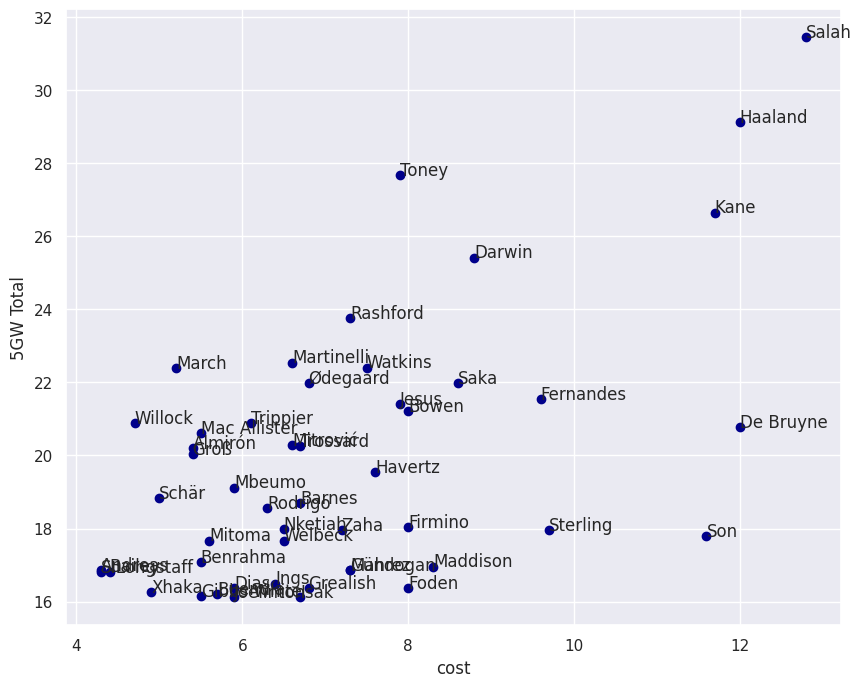

In [229]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=Top50['cost'],y=Top50['5GW Total'],c='DarkBlue')
# set labels
ax.set_xlabel('cost')
ax.set_ylabel('5GW Total')

# annotate points in axis
for idx, row in Top50.iterrows():
    ax.annotate(row['name'], (row['cost'], row['5GW Total']) )
# force matplotlib to draw the graph
plt.show()

In [230]:
apiplayers = fplwithunderstat.drop(columns=[ 
'goals_scored',
'points_per_game',
 'player_name',
 'understat',
 'goals_28wks',
 'assists_28wks',
 'shots_28wks',
 'key_passes_28wks',
 'yellow_cards',
 'red_cards',
 'npg_28wks',
 'npxG_28wks',
 'xGChain',
 'xGBuildup',
 'xgdifference',
 'xAdifference'
 ])
apiplayers

,id,team,pos,name,cost,selected_by_percent,assists,bps,ict_index,points,minutes,fpl_id,games,time,xG_28wks,xA_28wks,position,team_title
0,3,Arsenal,M,Xhaka,4.9,2.5,5,490,154.2,115,2378,3,28,2315.0,3.514744,4.022477,M S,Arsenal
1,4,Arsenal,M,Elneny,4.1,0.6,0,27,1.1,6,111,4,5,107.0,0.000000,0.000000,M S,Arsenal
2,5,Arsenal,D,Holding,4.2,0.1,0,55,5.5,11,197,5,9,193.0,0.098614,0.000000,D S,Arsenal
3,6,Arsenal,M,Partey,4.7,0.4,0,381,102.4,73,1920,6,24,1932.0,2.101601,1.402674,M S,Arsenal
4,7,Arsenal,M,Ødegaard,6.8,30.4,8,628,241.9,159,2395,7,28,2438.0,7.149257,8.041075,M,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,682,Wolverhampton Wanderers,F,Cunha,5.4,0.1,0,50,24.8,20,513,682,10,517.0,1.071081,0.682066,F S,Wolverhampton Wanderers
749,698,Wolverhampton Wanderers,M,Lemina,4.5,0.0,0,98,15.6,13,641,698,10,662.0,0.087517,0.100569,M S,Wolverhampton Wanderers
750,704,Wolverhampton Wanderers,M,Sarabia,5.4,0.1,0,44,36.8,19,560,704,9,571.0,2.227917,0.714920,F M S,Wolverhampton Wanderers
751,717,Wolverhampton Wanderers,G,Bentley,4.0,0.0,0,0,0.0,0,0,717,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
Mostselected = apiplayers.nlargest(20, 'selected_by_percent')
Mostselected

,id,team,pos,name,cost,selected_by_percent,assists,bps,ict_index,points,minutes,fpl_id,games,time,xG_28wks,xA_28wks,position,team_title
475,318,Manchester City,F,Haaland,12.0,72.2,6,803,271.1,203,2111,318,26,2140.0,23.960191,4.408665,F S,Manchester City
534,357,Newcastle United,D,Trippier,6.1,66.9,7,728,210.6,166,2377,357,27,2396.0,0.734555,9.833534,D,Newcastle United
499,335,Manchester United,M,Rashford,7.3,52.4,4,418,200.3,158,2218,335,27,2236.0,12.471867,2.491732,F M S,Manchester United
118,80,Brentford,F,Toney,7.9,41.3,4,514,215.1,154,2331,80,26,2336.0,18.485521,3.881621,F,Brentford
10,13,Arsenal,M,Saka,8.6,41.0,11,568,267.2,171,2436,13,28,2363.0,8.589807,5.556230,F M S,Arsenal
651,427,Tottenham,F,Kane,11.7,40.1,6,710,301.2,189,2596,427,28,2514.0,18.678179,4.823749,F,Tottenham
15,19,Arsenal,M,Martinelli,6.6,37.5,6,521,246.5,162,2343,19,28,2293.0,8.297306,6.814451,F M S,Arsenal
4,7,Arsenal,M,Ødegaard,6.8,30.4,8,628,241.9,159,2395,7,28,2438.0,7.149257,8.041075,M,Arsenal
431,283,Liverpool,M,Salah,12.8,27.3,8,414,245.5,160,2385,283,27,2397.0,13.968641,6.262979,F M,Liverpool
172,124,Brighton,M,Mitoma,5.6,25.9,6,373,126.7,103,1354,124,21,1355.0,4.546160,4.203638,D M S,Brighton


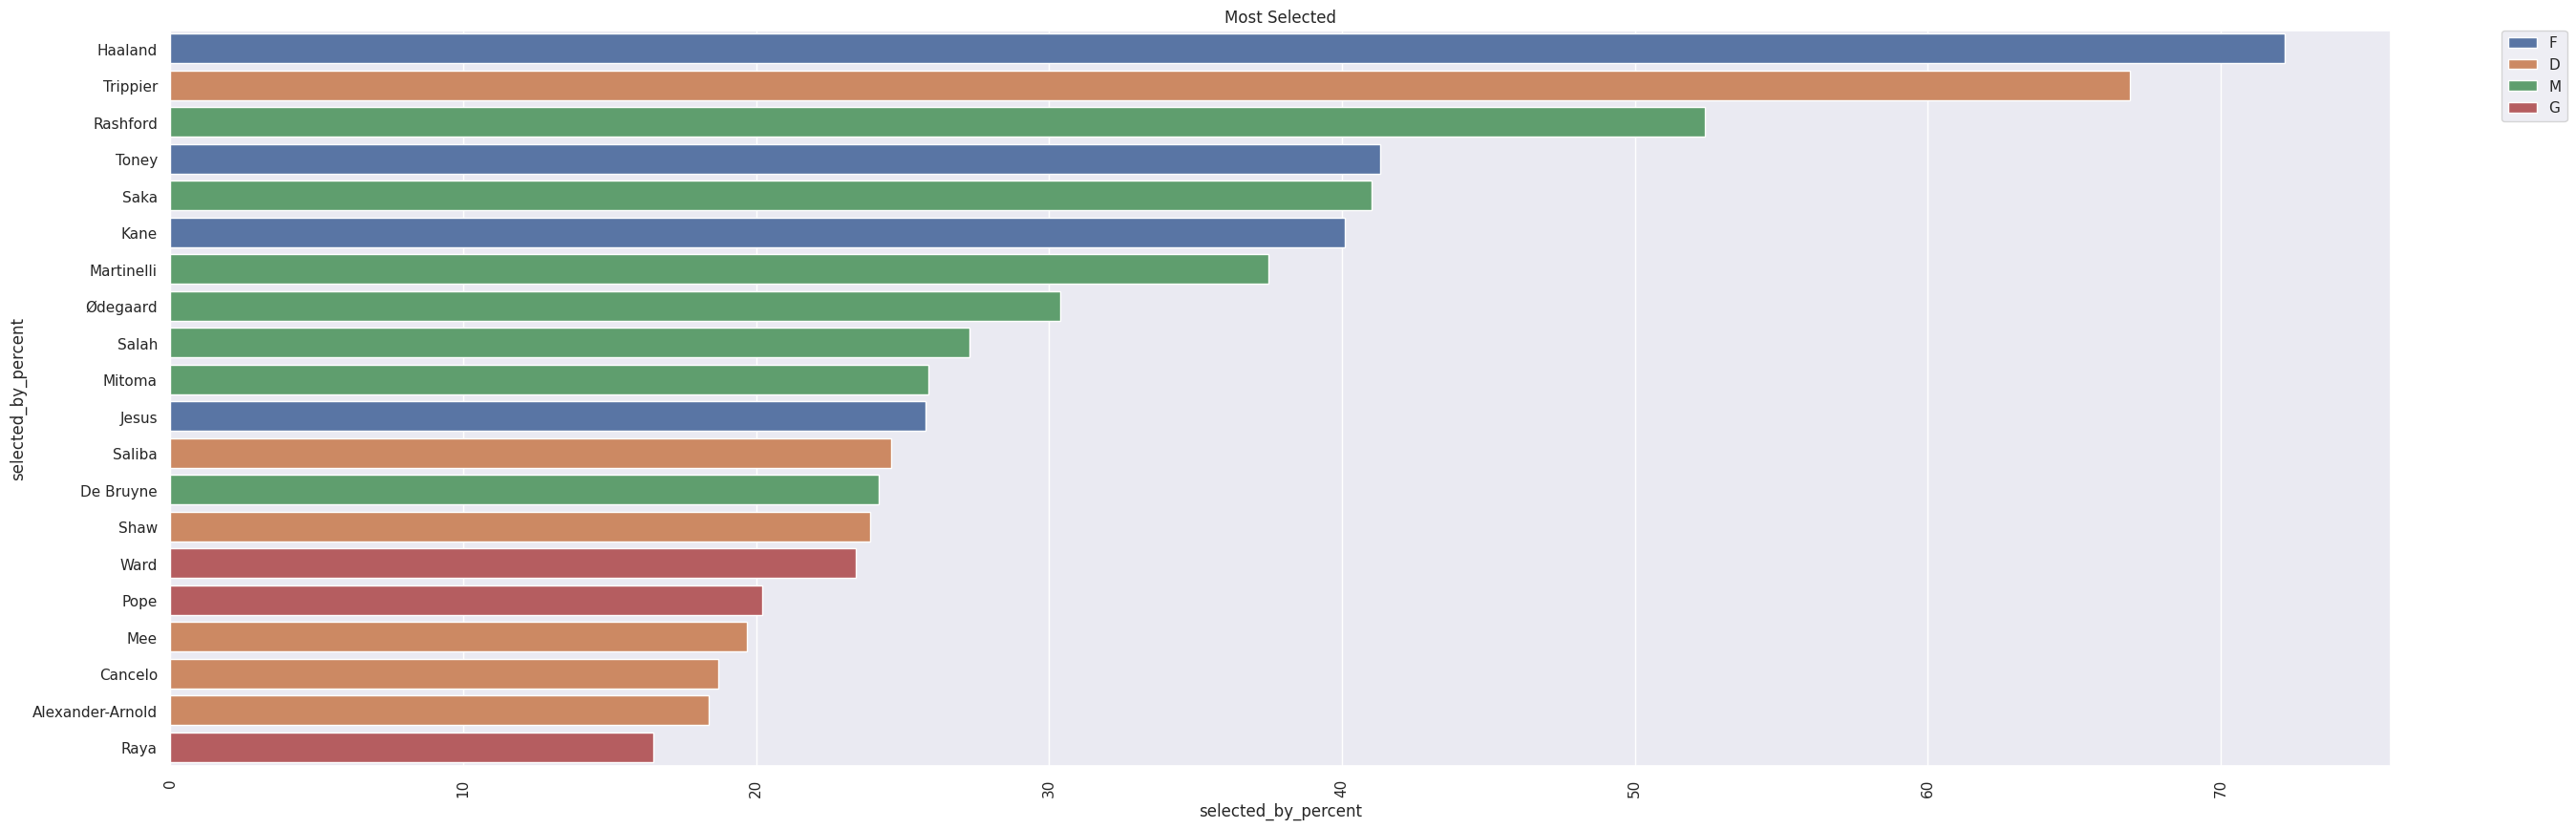

In [232]:
ax = sns.barplot(x='selected_by_percent', y='name', data=Mostselected, hue='pos', dodge=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Most Selected")
plt.xticks(rotation=90)
plt.ylabel("selected_by_percent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gcf().set_size_inches(30,10)

In [233]:
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltablexGxGc= epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc= epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc= epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc= epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc= epltablexGxGc.replace('Manchester Utd','Manchester United')
epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc= epltablexGxGc.replace('Nottham Forest','Nottingham Forest')
epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/23))
epltablexGxGc.rename(columns={'Squad': 'team'}, inplace=True)
epltablexGxGc['xG/90'] = (epltablexGxGc.xG / epltablexGxGc.MP)
epltablexGxGc['xGA/90'] = (epltablexGxGc.xGA / epltablexGxGc.MP)
epltablexGxGc

<ipython-input-233-f34def3770e4>:14: FutureWarning:

The default value of regex will change from True to False in a future version.



,Rk,team,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xCSP,xG/90,xGA/90
0,1,Arsenal,29,23,3,3,70,27,43,72,2.48,57.5,27.8,29.8,1.03,-0.834783,1.982759,0.958621
1,2,Manchester City,28,20,4,4,71,26,45,64,2.29,59.0,21.8,37.1,1.33,0.208696,2.107143,0.778571
2,3,Newcastle United,27,13,11,3,41,19,22,50,1.85,45.4,25.3,20.1,0.74,-0.400000,1.681481,0.937037
3,4,Tottenham,29,15,5,9,53,41,12,50,1.72,42.4,34.7,7.7,0.27,-2.034783,1.462069,1.196552
4,5,Manchester United,27,15,5,7,41,37,4,50,1.85,41.2,36.3,4.9,0.18,-2.313043,1.525926,1.344444
5,6,Brighton,26,12,7,7,49,34,15,43,1.65,46.9,30.5,16.5,0.63,-1.304348,1.803846,1.173077
6,7,Brentford,28,10,13,5,46,37,9,43,1.54,40.7,37.4,3.4,0.12,-2.504348,1.453571,1.335714
7,8,Liverpool,27,12,6,9,48,33,15,42,1.56,47.8,37.6,10.2,0.38,-2.539130,1.770370,1.392593
8,9,Aston Villa,28,12,5,11,37,39,-2,41,1.46,36.1,43.0,-6.9,-0.25,-3.478261,1.289286,1.535714
9,10,Fulham,28,11,6,11,39,39,0,39,1.39,34.5,47.5,-13.1,-0.47,-4.260870,1.232143,1.696429


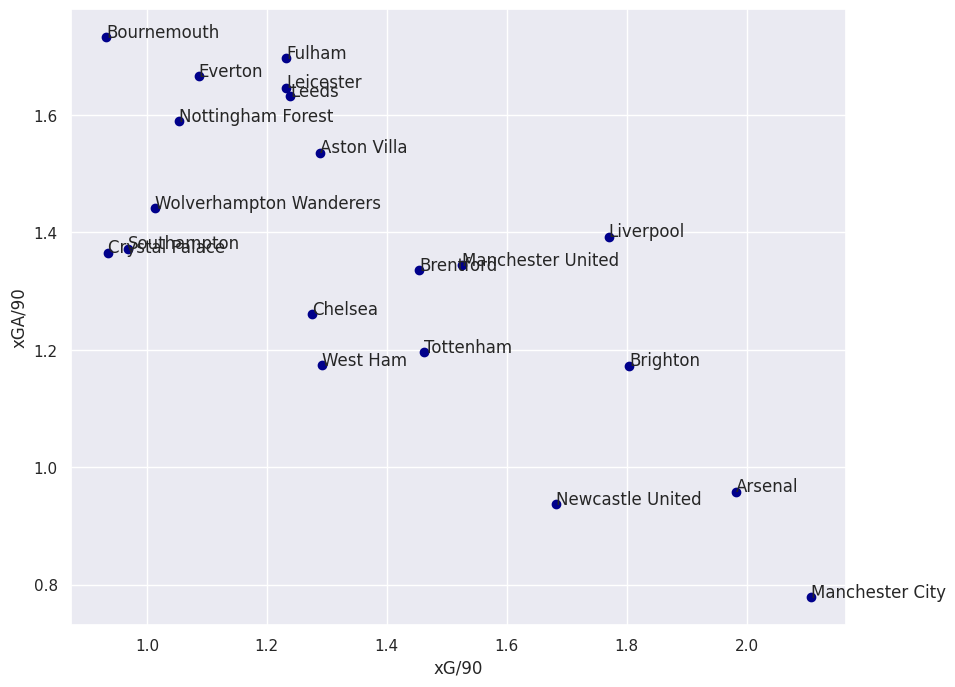

In [234]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=epltablexGxGc['xG/90'],y=epltablexGxGc['xGA/90'],c='DarkBlue')
# set labels
ax.set_xlabel('xG/90')
ax.set_ylabel('xGA/90')

# annotate points in axis
for idx, row in epltablexGxGc.iterrows():
    ax.annotate(row['team'], (row['xG/90'], row['xGA/90']) )
# force matplotlib to draw the graph
plt.show()

In [235]:
EPL_player_df

,id,player_name,games_x,time_x,goals_28wks_x,xG_28wks_x,assists_28wks_x,xA_28wks_x,shots_28wks_x,key_passes_28wks_x,...,yellow_cards,red_cards,position_y,team_title_y,npg_28wks_y,npxG_28wks_y,xGChain,xGBuildup,goals,assists
0,8260,Erling Haaland,26,2140,28,23.960190907120705,5,4.408665340393782,90,19,...,4,0,F S,Manchester City,23,20.15434619784355,23.321432292461395,2.191996343433857,28,5
1,647,Harry Kane,28,2514,22,18.67817907780409,2,4.82374859880656,104,41,...,5,0,F,Tottenham,18,14.872338406741619,17.036890506744385,3.063931160606444,22,2
2,998,Ivan Toney,26,2336,17,18.485520754009485,4,3.881621390581131,75,20,...,9,0,F,Brentford,12,14.679681720212102,15.411244990304112,3.8031660076230764,17,4
3,556,Marcus Rashford,27,2236,14,12.471867196261883,3,2.4917316902428865,69,18,...,2,0,F M S,Manchester United,14,12.471867196261883,19.61304687615484,5.588982158340514,14,3
4,1250,Mohamed Salah,27,2397,12,13.968640696257353,7,6.2629787735641,82,48,...,2,0,F M,Liverpool,12,13.207471828907728,21.80546774715185,4.8836626168340445,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,11362,Facundo Buonanotte,4,42,0,0.15204254537820816,1,0.10160453617572784,2,3,...,0,0,S,Brighton,0,0.15204254537820816,0.3552328273653984,0.22122468054294586,0,1
531,11363,Antoine Semenyo,7,228,0,0.27413253858685493,0,0.04051905870437622,2,1,...,0,0,F M S,Bournemouth,0,0.27413253858685493,1.0346557050943375,0.720004104077816,0,0
532,11366,Jhon Durán,6,53,0,0.7512963395565748,0,0,7,0,...,0,0,S,Aston Villa,0,0.7512963395565748,0.24072658689692616,0.08821941539645195,0,0
533,11367,Victor Kristiansen,5,416,0,0.08544669300317764,0,0.26779788732528687,1,4,...,1,0,D,Leicester,0,0.08544669300317764,1.5921539589762688,1.3503931686282158,0,0


In [236]:
EPL_player_df['goals'] = EPL_player_df['goals_28wks_x'].astype(int)
top25goals = EPL_player_df.nlargest(20, 'goals')
top25goals

,id,player_name,games_x,time_x,goals_28wks_x,xG_28wks_x,assists_28wks_x,xA_28wks_x,shots_28wks_x,key_passes_28wks_x,...,yellow_cards,red_cards,position_y,team_title_y,npg_28wks_y,npxG_28wks_y,xGChain,xGBuildup,goals,assists
0,8260,Erling Haaland,26,2140,28,23.960190907120705,5,4.408665340393782,90,19,...,4,0,F S,Manchester City,23,20.15434619784355,23.321432292461395,2.191996343433857,28,5
1,647,Harry Kane,28,2514,22,18.67817907780409,2,4.82374859880656,104,41,...,5,0,F,Tottenham,18,14.872338406741619,17.036890506744385,3.063931160606444,22,2
2,998,Ivan Toney,26,2336,17,18.485520754009485,4,3.881621390581131,75,20,...,9,0,F,Brentford,12,14.679681720212102,15.411244990304112,3.8031660076230764,17,4
3,556,Marcus Rashford,27,2236,14,12.471867196261883,3,2.4917316902428865,69,18,...,2,0,F M S,Manchester United,14,12.471867196261883,19.61304687615484,5.588982158340514,14,3
4,1250,Mohamed Salah,27,2397,12,13.968640696257353,7,6.2629787735641,82,48,...,2,0,F M,Liverpool,12,13.207471828907728,21.80546774715185,4.8836626168340445,12,7
5,7322,Bukayo Saka,28,2363,12,8.589806832373142,10,5.556229875423014,66,61,...,5,0,F M S,Arsenal,10,7.067467965185642,18.258643992245197,9.001119613647461,12,10
6,7752,Gabriel Martinelli,28,2293,12,8.297306101769209,3,6.814450889825821,69,44,...,3,0,F M S,Arsenal,12,8.297306101769209,20.868492770940065,8.972832642495632,12,3
7,773,Aleksandar Mitrovic,21,1826,11,12.94936506729573,1,2.2520498633384705,86,14,...,6,0,F,Fulham,8,8.382350136525929,10.872325327247381,2.5349111557006836,11,1
8,2381,Rodrigo,21,1392,11,7.380342595279217,1,1.9322076858952641,54,13,...,3,0,F M S,Leeds,10,6.619173593819141,8.823007866740227,2.3534745248034596,11,1
9,7420,Miguel Almirón,25,2044,11,7.006077282130718,1,1.9375420259311795,50,18,...,2,0,F S,Newcastle United,11,7.006077282130718,11.025347724556923,4.3116087801754475,11,1


In [237]:
EPL_player_df['assists'] = EPL_player_df['assists_28wks_x'].astype(int)
top25assists = EPL_player_df.nlargest(20, 'assists')
top25assists

,id,player_name,games_x,time_x,goals_28wks_x,xG_28wks_x,assists_28wks_x,xA_28wks_x,shots_28wks_x,key_passes_28wks_x,...,yellow_cards,red_cards,position_y,team_title_y,npg_28wks_y,npxG_28wks_y,xGChain,xGBuildup,goals,assists
35,447,Kevin De Bruyne,26,2049,5,4.266442358493805,13,13.311456121504307,58,82,...,1,0,M S,Manchester City,5,4.266442358493805,24.799899093806744,14.376750972121954,5,13
5,7322,Bukayo Saka,28,2363,12,8.589806832373142,10,5.556229875423014,66,61,...,5,0,F M S,Arsenal,10,7.067467965185642,18.258643992245197,9.001119613647461,12,10
18,7698,Leandro Trossard,27,1895,8,6.654470920562744,9,5.316929295659065,48,38,...,1,0,D F M S,"Arsenal,Brighton",8,6.654470920562744,14.561029262840748,5.438887329772115,8,9
4,1250,Mohamed Salah,27,2397,12,13.968640696257353,7,6.2629787735641,82,48,...,2,0,F M,Liverpool,12,13.207471828907728,21.80546774715185,4.8836626168340445,12,7
10,2517,Martin Odegaard,28,2438,10,7.149256836622953,7,8.041074538603425,76,65,...,4,0,M,Arsenal,10,7.149256836622953,22.402919486165047,11.84784484654665,10,7
149,646,Christian Eriksen,19,1516,1,2.961910138837993,7,3.2982375659048557,22,25,...,3,0,F M S,Manchester United,1,2.961910138837993,10.68345970660448,6.751400478184223,1,7
14,6818,James Maddison,21,1727,9,3.9820023281499743,6,4.8164521884173155,59,48,...,8,0,F M S,Leicester,9,3.9820023281499743,8.989696528762579,4.098894331604242,9,6
37,1228,Bruno Fernandes,26,2340,5,5.3959971237927675,6,10.711216825060546,55,73,...,5,0,M,Manchester United,4,4.634828286245465,23.263709222897887,11.342286467552185,5,6
72,922,Andreas Pereira,28,2377,3,4.829159126617014,6,4.750810083001852,46,58,...,8,0,M,Fulham,2,4.067990110255778,8.129611214622855,3.7735667265951633,3,6
88,8720,Jack Harrison,26,1982,3,3.815866089425981,6,3.172725735232234,27,39,...,2,0,M S,Leeds,3,3.815866089425981,9.054691560566425,3.842058639973402,3,6


In [238]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [239]:
fig3= go.Figure()
fig3.add_trace(go.Scatter(x = top25goals["goals"], 
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'goals'))
fig3.add_trace(go.Scatter(x = top25goals["xG_28wks_x"], 
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange', 
                          marker_size = 10,
                          name = 'xG'))
for i in range(0, len(top25goals)):
               fig3.add_shape(type='line',
                              x0 = top25goals["goals"][i],
                              y0 = i,
                              x1 = top25goals["xG_28wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig3.update_layout(title_text =
                    "Goals vs xG",
                    title_font_size = 30)
fig3.update_xaxes(range=[0, 30])
fig3.show()

In [240]:
seasonedit = twentyeight_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])

In [241]:
top25assists.columns

Index(['id', 'player_name', 'games_x', 'time_x', 'goals_28wks_x', 'xG_28wks_x',
       'assists_28wks_x', 'xA_28wks_x', 'shots_28wks_x', 'key_passes_28wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_28wks_x', 'npxG_28wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_28wks_y', 'xG_28wks_y', 'assists_28wks_y', 'xA_28wks_y',
       'shots_28wks_y', 'key_passes_28wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_28wks_y', 'npxG_28wks_y', 'xGChain',
       'xGBuildup', 'goals', 'assists'],
      dtype='object')

In [242]:
top20assists = top25assists.drop(columns=[ 'shots_28wks_x', 'key_passes_28wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_28wks_x', 'npxG_28wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_28wks_y', 'xG_28wks_y', 'assists_28wks_y', 'xA_28wks_y',
       'shots_28wks_y', 'key_passes_28wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_28wks_y', 'npxG_28wks_y', 'xGChain',
       'xGBuildup', 'assists_28wks_x', 'games_x', 'time_x', 'goals_28wks_x', 'id' ])

top20assists.reset_index(inplace = True,drop = True)
top20assists

,player_name,xG_28wks_x,xA_28wks_x,goals,assists
0,Kevin De Bruyne,4.266442358493805,13.311456121504307,5,13
1,Bukayo Saka,8.589806832373142,5.556229875423014,12,10
2,Leandro Trossard,6.654470920562744,5.316929295659065,8,9
3,Mohamed Salah,13.968640696257353,6.2629787735641,12,7
4,Martin Odegaard,7.149256836622953,8.041074538603425,10,7
5,Christian Eriksen,2.961910138837993,3.2982375659048557,1,7
6,James Maddison,3.9820023281499743,4.8164521884173155,9,6
7,Bruno Fernandes,5.3959971237927675,10.711216825060546,5,6
8,Andreas Pereira,4.829159126617014,4.750810083001852,3,6
9,Jack Harrison,3.815866089425981,3.172725735232234,3,6


In [243]:
fig4= go.Figure()
fig4.add_trace(go.Scatter(x = top20assists["assists"], 
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'assists'))
fig4.add_trace(go.Scatter(x = top20assists["xA_28wks_x"], 
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange', 
                          marker_size = 10,
                          name = 'xA'))
for i in range(0, len(top20assists)):
               fig4.add_shape(type='line',
                              x0 = top20assists['assists'][i],
                              y0 = i,
                              x1 = top20assists["xA_28wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig4.update_layout(title_text =
                    "assists vs xG",
                    title_font_size = 15)
fig4.update_xaxes(range=[0, 15])
fig4.show()